In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [51]:
fuel = pd.read_csv('fuel-econ.csv')

fuel['trans_type'] = fuel['trans'].apply(lambda x: x.split()[0])

sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel['VClass'] = fuel['VClass'].astype(vclasses);

In [52]:
np.random.seed(2018)
sample = np.random.choice(fuel.shape[0], 200, replace = False)
fuel_subset = fuel.loc[sample]

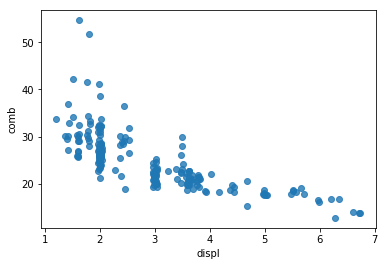

In [53]:
sb.regplot(data = fuel_subset, x = 'displ', y = 'comb', x_jitter = 0.04, fit_reg = False);

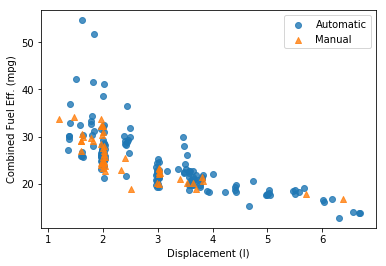

In [54]:
ttype_marker = [['Automatic', 'o'],
               ['Manual','^']]
for ttype, marker in ttype_marker:
    plot_data = fuel_subset.loc[fuel_subset['trans_type'] == ttype]
    sb.regplot(data = plot_data, x = 'displ', y = 'comb', x_jitter = 0.04, fit_reg = False, marker = marker);
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.legend(['Automatic','Manual']);

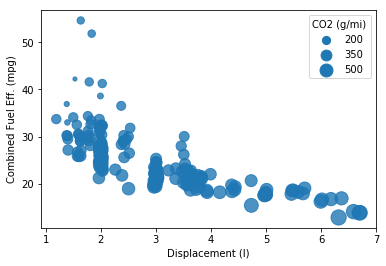

In [55]:
sb.regplot(data = fuel_subset, x = 'displ', y = 'comb', x_jitter = 0.04, fit_reg = False, 
           scatter_kws = {'s': fuel_subset['co2']/3});
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

sizes = [200, 350, 500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[], s = s/3, color = base_color))
plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)');

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


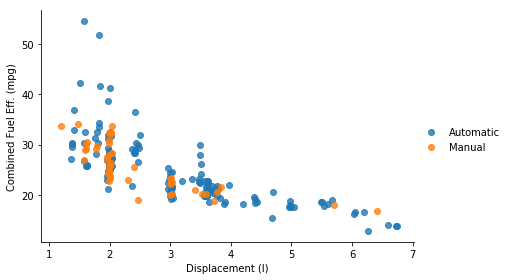

In [56]:
g = sb.FacetGrid(data = fuel_subset, hue = 'trans_type', hue_order = ['Automatic', 'Manual'],
                size = 4, aspect = 1.5);
g = g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
g.add_legend(title = '');
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

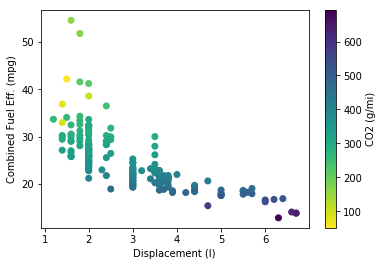

In [57]:
plt.scatter(data = fuel_subset, x = 'displ', y = 'comb', c = 'co2', cmap = 'viridis_r');
plt.colorbar(label = 'CO2 (g/mi)')
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

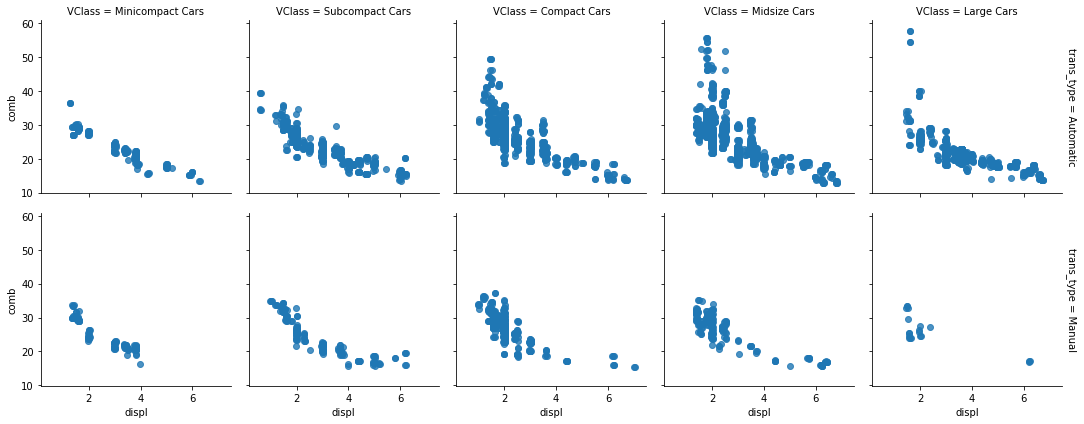

In [66]:
g = sb.FacetGrid(data = fuel, col ='VClass', row = 'trans_type', margin_titles = True);
g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);

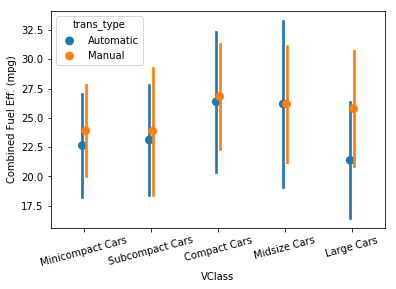

In [74]:
sb.pointplot(data = fuel, x = 'VClass', y = 'comb', hue = 'trans_type', ci = 'sd', linestyles = '', dodge = True);
plt.xticks(rotation = 15);
plt.ylabel('Combined Fuel Eff. (mpg)');

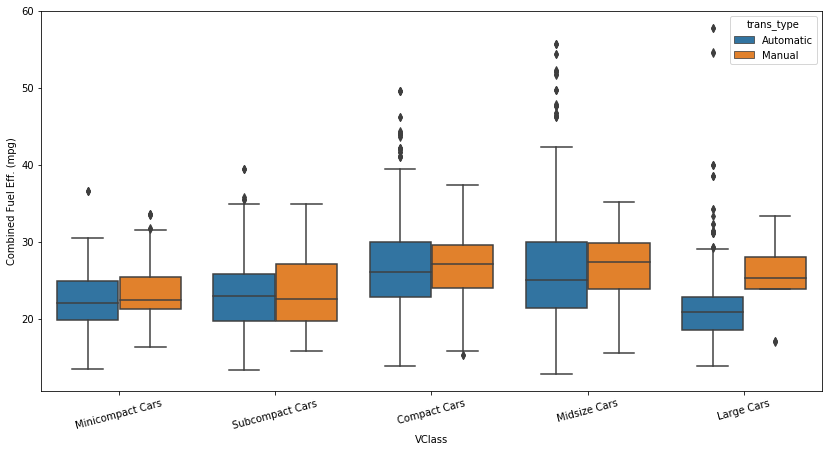

In [72]:
plt.figure(figsize = [14,7]);
sb.boxplot(data = fuel, x = 'VClass', y = 'comb', hue = 'trans_type');
plt.xticks(rotation = 15);
plt.ylabel('Combined Fuel Eff. (mpg)');

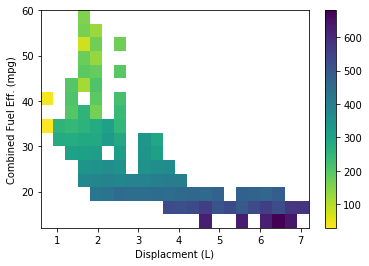

In [100]:
bins_x = np.arange(0.6, 7 + .3, 0.3);
bins_y = np.arange(12, 58 + 3, 3);
plt.hist2d(data = fuel, x = 'displ', y = 'comb', cmin = 0.5, 
           cmap = 'viridis_r', bins = [bins_x, bins_y], weights = co2_weights);
plt.colorbar()
plt.xlabel('Displacment (L)');
plt.ylabel('Combined Fuel Eff. (mpg)');

In [99]:
displ_bins = pd.cut(fuel['displ'], bins_x, right = False, include_lowest = False,
                   labels = False).astype(int)
comb_bins = pd.cut(fuel['comb'], bins_y, right = False, include_lowest = False,
                   labels = False).astype(int)

n_points = fuel.groupby([displ_bins, comb_bins]).size()
n_points = n_points.reset_index().pivot(index = 'displ', columns = 'comb').values

co2_weights = fuel['co2'] / n_points[displ_bins, comb_bins]

In [96]:
n_points[displ_bins, comb_bins]

array([173., 405., 173., ...,   6., 190., 190.])

In [101]:
pokemon = pd.read_csv('pokemon.csv')

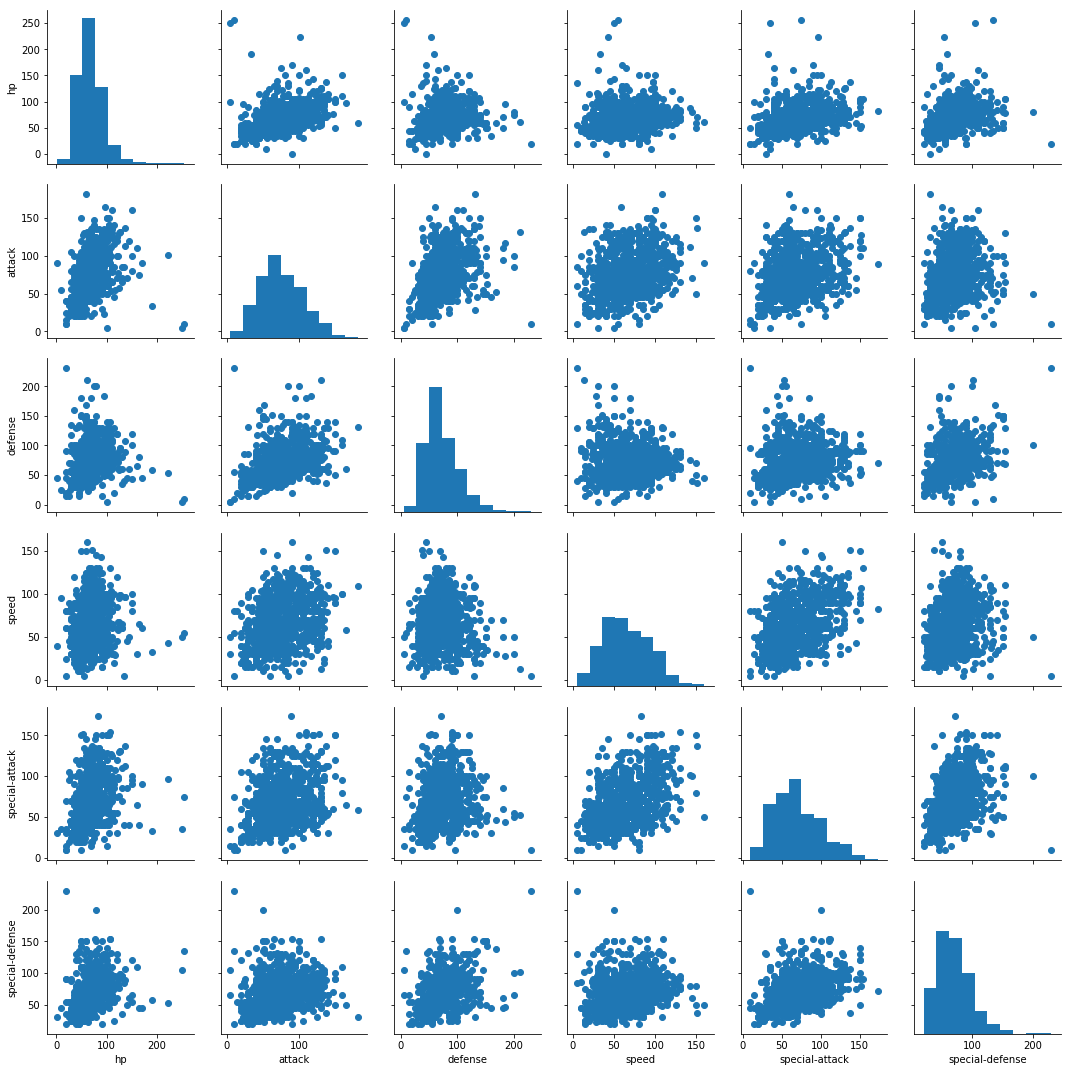

In [104]:
pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sb.PairGrid(data = pokemon, vars = pkmn_stats);
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

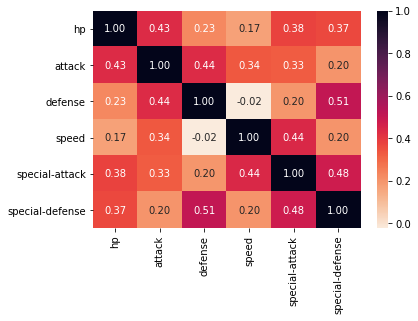

In [115]:
sb.heatmap(pokemon[pkmn_stats].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f');